**IMPORT LIBRARY YANG DIBUTUHKAN**

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline
sns.set(color_codes=True)

from sklearn.neighbors import KNeighborsClassifier

**BACA DATA**

In [505]:
df = pd.read_csv("dataSmoker.csv")
df.head(5)

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


**PRA-PEMROSESAN DATA**

Null Value : Menangani data yang hilang

In [506]:
print(df.isnull().sum())

pid                    0
age                    0
gender                 0
race                 261
smoker                 0
days_to_cancer     51394
stage_of_cancer    51395
dtype: int64


In [507]:
df = df.dropna()
print(df.isnull().sum())

pid                0
age                0
gender             0
race               0
smoker             0
days_to_cancer     0
stage_of_cancer    0
dtype: int64


Reduksi data : Menangani kolom yang tidak relevan atau tidak diperlukan atau tidak digunakan pada proses analisa dan prediksi nanti

In [508]:
df = df.drop(["pid"], axis=1)

In [509]:
df.head(5)

,age,gender,race,smoker,days_to_cancer,stage_of_cancer
11,161,Female,White,Current,454.0,IA
48,174,Female,White,Current,2428.0,IIB
54,67,Male,White,Former,148.0,IV
146,168,Male,White,Former,491.0,IA
157,165,Male,White,Former,795.0,IA


Menulis ulang penamaan Header

In [510]:
df = df.rename(columns={"age":"Umur", "gender":"Gender", "race":"Kulit", "smoker":"Status", "days_to_cancer":"Total Hari", "stage_of_cancer":"Stadium"})
df

,Umur,Gender,Kulit,Status,Total Hari,Stadium
11,161,Female,White,Current,454.0,IA
48,174,Female,White,Current,2428.0,IIB
54,67,Male,White,Former,148.0,IV
146,168,Male,White,Former,491.0,IA
157,165,Male,White,Former,795.0,IA
...,...,...,...,...,...,...
53356,60,Female,White,Former,27.0,IB
53366,69,Female,White,Current,71.0,IA
53370,56,Male,White,Current,1077.0,IV
53405,61,Male,White,Former,1632.0,IV


Menghilangkan duplikasi baris

In [511]:
df.shape

(2022, 6)

In [512]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4, 6)


In [513]:
df.count()

Umur          2022
Gender        2022
Kulit         2022
Status        2022
Total Hari    2022
Stadium       2022
dtype: int64

In [514]:
df = df.drop_duplicates()
df.head(5)

,Umur,Gender,Kulit,Status,Total Hari,Stadium
11,161,Female,White,Current,454.0,IA
48,174,Female,White,Current,2428.0,IIB
54,67,Male,White,Former,148.0,IV
146,168,Male,White,Former,491.0,IA
157,165,Male,White,Former,795.0,IA


In [515]:
df.count()

Umur          2018
Gender        2018
Kulit         2018
Status        2018
Total Hari    2018
Stadium       2018
dtype: int64

**Exploratory Data Analysis**

Outlier : Outlier adalah titik atau kumpulan titik data yang terletak jauh dari nilai data lainnya dari kumpulan data.

Deteksi outliers Umur

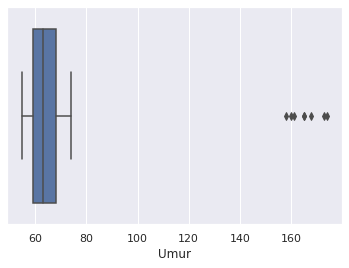

In [516]:
sns.boxplot(x=df['Umur'])

Deteksi outliers Total Hari

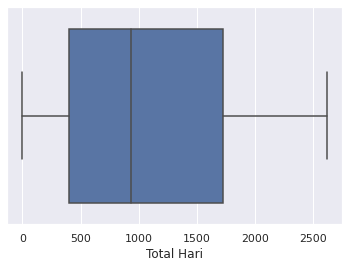

In [517]:
sns.boxplot(x=df['Total Hari'])

In [518]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Umur             9.0
Total Hari    1323.5
dtype: float64


In [519]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-519-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(2010, 6)

Mengecek Kesimpulan dari central Tendency, dispersi, dan bentuk distribusi dataset (tidak termasuk nilai NaN)

In [520]:
df.describe()

,Umur,Total Hari
count,2010.000000,2010.000000
mean,63.672637,1049.787562
std,5.290872,742.686862
min,55.000000,0.000000
25%,59.000000,398.500000
50%,63.000000,931.000000
75%,68.000000,1723.000000
max,74.000000,2618.000000


Mengecek ringkasan info dari data berupa tipe indeks dan kolom, nilai non-null, dan penggunaan memori

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 54 to 53418
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Umur        2010 non-null   int64  
 1   Gender      2010 non-null   object 
 2   Kulit       2010 non-null   object 
 3   Status      2010 non-null   object 
 4   Total Hari  2010 non-null   float64
 5   Stadium     2010 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 109.9+ KB


Mencari rata-rata dari semua titik data sebelum proses EDA

In [522]:
df.mean()

<ipython-input-522-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Umur            63.672637
Total Hari    1049.787562
dtype: float64

Mencari nilai median yakni nilai tengah

In [523]:
df.median()

<ipython-input-523-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Umur           63.0
Total Hari    931.0
dtype: float64

Mencari nilai modus yakni titik data yang paling banyak muncul sebelum proses EDA

In [524]:
df.mode()

,Umur,Gender,Kulit,Status,Total Hari,Stadium
0,61,Male,White,Current,98.0,IA


Mencari varian yakni rata-rata kuadrat dari deviasi individu sebelum proses EDA

In [525]:
df.var()

<ipython-input-525-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Umur              27.993328
Total Hari    551583.775156
dtype: float64

Mencari Standar Deviasi yakni simpangan baku atau akar kuadrat dari varians sebelum proses EDA

In [526]:
df.std()

<ipython-input-526-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Umur            5.290872
Total Hari    742.686862
dtype: float64

Mencari Kecondongan Data (Skewnes) sebelum proses EDA

In [527]:
df.skew()

<ipython-input-527-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Umur          0.161181
Total Hari    0.203153
dtype: float64

**VISUALISASI DATA**

Menggunakan matplotlib

In [528]:
col_A = df['Umur']
umur_array = col_A.to_numpy()
# umur_array = sorted(umur_array)

col_B = df['Status']
status_array = col_B.to_numpy()

col_C = df['Total Hari']
hari_array = col_C.to_numpy()
# hari_array = sorted(hari_array)

col_D = df['Kulit']
kulit_array = col_D.to_numpy()

col_E = df['Gender']
gender_array = col_E.to_numpy()

print(umur_array)
print(status_array)
print(hari_array)
print(kulit_array)
print(gender_array)

[67 69 60 ... 56 61 57]
['Former' 'Current' 'Current' ... 'Current' 'Former' 'Former']
[ 148.  524.  456. ... 1077. 1632. 2144.]
['White' 'White' 'White' ... 'White' 'White' 'White']
['Male' 'Male' 'Female' ... 'Male' 'Male' 'Female']


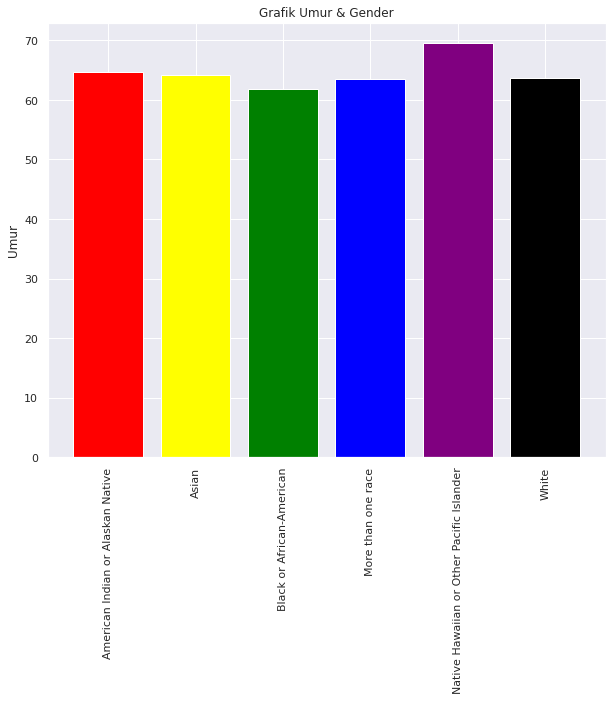

In [530]:
a = df.groupby(['Kulit']).mean()[['Umur']].reset_index()
fig = plt.figure(figsize=(10,8))
ax = plt.axes()
ax.bar(a['Kulit'],a['Umur'], color=['red','yellow','green','blue','purple','black','orange'])
plt.xticks(rotation=90)

plt.title("Grafik Umur & Gender")
plt.ylabel("Umur")
plt.show()

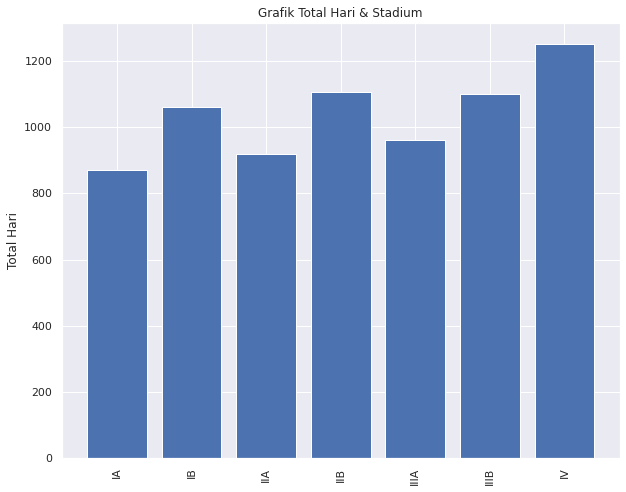

In [531]:
a = df.groupby(['Stadium']).mean()[['Total Hari']].reset_index()
fig = plt.figure(figsize=(10,8))
ax = plt.axes()
ax.bar(a['Stadium'],a['Total Hari'])
plt.xticks(rotation=90)

plt.title("Grafik Total Hari & Stadium")
plt.ylabel("Total Hari")
plt.show()

In [532]:
countStad = df["Stadium"].value_counts()

countStat = df["Status"].value_counts()

countStas = df["Kulit"].value_counts()

print(countStad)
print(countStat)
print(countStas)

IA      611
IV      588
IIIB    243
IIIA    213
IB      210
IIB      78
IIA      67
Name: Stadium, dtype: int64
Current    1213
Former      797
Name: Status, dtype: int64
White                                        1838
Black or African-American                     101
Asian                                          36
More than one race                             21
American Indian or Alaskan Native              10
Native Hawaiian or Other Pacific Islander       4
Name: Kulit, dtype: int64


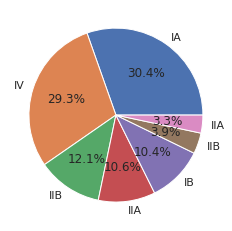

In [533]:
valueStadium = list(countStad)
gradeStadium = ["IA","IV","IIB","IIA","IB","IIB","IIA"]
plt.pie(valueStadium, labels = gradeStadium, autopct='%2.1f%%')
plt.show()

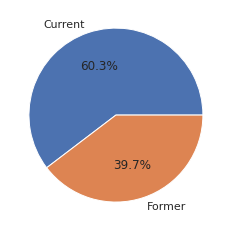

In [534]:
valueStadium = list(countStat)
gradeStadium = ["Current","Former"]
plt.pie(valueStadium, labels = gradeStadium, autopct='%2.1f%%')
plt.show()

**PEMODELAN ALGORITMA PREDIKTIF MENGGUNAKAN K-NEAREST NEIGHBORS**

In [535]:
encode_file = df.replace({
    "Gender":{
        "Male":0,
        "Female":1
        },
    "Kulit":{
        "White":0,
        "Black or African-American":1,
        "American Indian or Alaskan Native":2,
        "More than one race":3,
        "Asian":4,
        "Native Hawaiian or Other Pacific Islander":5
        },
    "Status":{
        "Current":0,
        "Former":1
        },
    "Stadium":{
        "IA":0,
        "IB":1,
        "IIA":2,
        "IIB":3,
        "IIIA":4,
        "IIIB":5,
        "IV":6
    }
      })

In [536]:
encode_file

,Umur,Gender,Kulit,Status,Total Hari,Stadium
54,67,0,0,1,148.0,6
263,69,0,0,0,524.0,6
279,60,1,0,0,456.0,0
291,68,0,0,0,734.0,0
322,65,0,0,0,557.0,6
...,...,...,...,...,...,...
53356,60,1,0,1,27.0,1
53366,69,1,0,0,71.0,0
53370,56,0,0,0,1077.0,6
53405,61,0,0,1,1632.0,6


In [537]:
col_A = encode_file['Umur']
umur_array = col_A.to_numpy()

col_B = encode_file['Status']
status_array = col_B.to_numpy()

col_C = encode_file['Total Hari']
hari_array = col_C.to_numpy()

col_D = encode_file['Kulit']
kulit_array = col_D.to_numpy()

col_E = encode_file['Gender']
gender_array = col_E.to_numpy()

col_F = encode_file['Stadium']
stadium_array = col_F.to_numpy()

print(umur_array)
print(status_array)
print(hari_array)
print(kulit_array)
print(gender_array)
print(stadium_array)

[67 69 60 ... 56 61 57]
[1 0 0 ... 0 1 1]
[ 148.  524.  456. ... 1077. 1632. 2144.]
[0 0 0 ... 0 0 0]
[0 0 1 ... 0 0 1]
[6 6 0 ... 6 6 0]


In [538]:
xTrain=[]

for i in range(len(umur_array)):
    dummy = []
    dummy.append(umur_array[i])
    dummy.append(status_array[i])
    xTrain.append(dummy)

print(xTrain)

[[67, 1], [69, 0], [60, 0], [68, 0], [65, 0], [64, 0], [61, 1], [61, 1], [63, 1], [56, 0], [60, 0], [59, 0], [64, 0], [63, 1], [65, 1], [70, 1], [68, 1], [60, 0], [56, 1], [69, 1], [59, 0], [70, 0], [62, 0], [72, 1], [60, 0], [59, 0], [59, 0], [60, 0], [62, 1], [70, 0], [67, 1], [73, 0], [59, 1], [57, 0], [66, 0], [67, 1], [68, 0], [67, 1], [56, 1], [70, 1], [71, 0], [55, 1], [71, 1], [65, 0], [74, 1], [63, 1], [59, 0], [55, 0], [61, 1], [58, 1], [68, 1], [59, 0], [74, 1], [63, 0], [68, 0], [57, 0], [65, 1], [58, 0], [65, 1], [66, 1], [68, 1], [63, 0], [62, 0], [63, 1], [62, 0], [60, 0], [60, 1], [66, 0], [57, 0], [58, 1], [56, 0], [67, 1], [62, 1], [61, 0], [69, 1], [57, 0], [63, 0], [65, 0], [61, 0], [61, 0], [73, 0], [59, 0], [69, 0], [55, 0], [69, 1], [56, 1], [57, 0], [66, 0], [60, 1], [62, 1], [57, 0], [68, 1], [62, 1], [64, 0], [58, 0], [69, 1], [58, 0], [58, 0], [58, 0], [58, 1], [56, 1], [69, 1], [57, 0], [68, 0], [62, 1], [74, 1], [71, 1], [62, 0], [59, 0], [65, 1], [67, 1], 

Prediksi dengan data yang baru

In [606]:
# Buat objek KNN dengan jumlah tetangga terdekat sebanyak 3
knn = KNeighborsClassifier(n_neighbors=1)

# Tentukan data latih dan target yang akan digunakan
# X = [[24.5, 34.5], [22.6, 31.1], [28.3, 38.2], [26.7, 35.3], [24.7, 33.2]]
Xlatih = xTrain
ylatih = stadium_array

# Latih model KNN dengan data latih yang telah ditentukan
knn.fit(Xlatih, ylatih)

# Prediksi nilai target dari suatu objek baru
# Misalnya, kita ingin memprediksi jenis sepatu dengan ukuran 24.5 cm dan 35.4 cm
new_data = [[70,0]] # [umur,status]
prediction = knn.predict(new_data)

# Tampilkan hasil prediksi
print(prediction)


[5]


Prediksi dengan data yang ada

In [597]:
import sklearn
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [598]:
X = encode_file.drop("Stadium", axis=1)
X = preprocessing.scale(X)
y = encode_file["Stadium"]

In [599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [600]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [601]:
accuracy = clf.score(X_train, y_train)
print("Accuracy", accuracy)

Accuracy 0.9971570717839374


In [602]:
#Prediksi
for X,y in zip(X_test, y_test):
  print(f"Predicted Target:{clf.predict([X])[0]}, Actual Target: {y}")

Predicted Target:6, Actual Target: 6
Predicted Target:0, Actual Target: 6
Predicted Target:2, Actual Target: 5
Predicted Target:0, Actual Target: 0
Predicted Target:4, Actual Target: 5
Predicted Target:0, Actual Target: 0
Predicted Target:3, Actual Target: 1
Predicted Target:0, Actual Target: 0
Predicted Target:0, Actual Target: 0
Predicted Target:6, Actual Target: 4
Predicted Target:0, Actual Target: 6
Predicted Target:2, Actual Target: 0
Predicted Target:5, Actual Target: 6
Predicted Target:4, Actual Target: 5
Predicted Target:6, Actual Target: 4
Predicted Target:4, Actual Target: 0
Predicted Target:1, Actual Target: 6
Predicted Target:0, Actual Target: 0
Predicted Target:5, Actual Target: 4
Predicted Target:4, Actual Target: 6
Predicted Target:0, Actual Target: 0
Predicted Target:0, Actual Target: 2
Predicted Target:2, Actual Target: 1
Predicted Target:4, Actual Target: 0
Predicted Target:1, Actual Target: 6
Predicted Target:6, Actual Target: 4
Predicted Target:0, Actual Target: 0
P